In [1]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [2]:
#emotion_labelデータの読みこみ

data2_c_label_50 = pd.read_csv('emotion_label/session2/C/emotion_C_20201111_2_50.csv')
data2_c_label_60 = pd.read_csv('emotion_label/session2/C/emotion_C_20201111_2_60.csv')
data2_c_label_70 = pd.read_csv('emotion_label/session2/C/emotion_C_20201111_2_70.csv')
data2_c_label_80 = pd.read_csv('emotion_label/session2/C/emotion_C_20201111_2_80.csv')

# data2_a_label_50 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_2_50.csv')
# data2_a_label_60 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_2_60.csv')
# data2_a_label_70 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_2_70.csv')
# data2_a_label_80 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
data2_c_record_all_feature_50 = pd.read_csv('feature/C/data2_c_50_record_all_feature.csv')
data2_c_record_all_feature_60 = pd.read_csv('feature/C/data2_c_60_record_all_feature.csv')
data2_c_record_all_feature_70 = pd.read_csv('feature/C/data2_c_70_record_all_feature.csv')
data2_c_record_all_feature_80 = pd.read_csv('feature/C/data2_c_80_record_all_feature.csv')

# data2_a_record_all_feature_50 = pd.read_csv('feature/session1/B/data2_a_50_record_all_feature.csv')
# data2_a_record_all_feature_60 = pd.read_csv('feature/session1/B/data2_a_60_record_all_feature.csv')
# data2_a_record_all_feature_70 = pd.read_csv('feature/session1/B/data2_a_70_record_all_feature.csv')
# data2_a_record_all_feature_80 = pd.read_csv('feature/session1/B/data2_a_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data2_c_record_all_feature_50)
display(data2_c_label_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 15:15:24,2020-11-11 15:15:28,10154.393,-674.988,701.922,94.003,78.505,-126.450,44267.902551,19535.903856,...,9556,-1088,-302,-581,-2944,-618,6.653620,78.194151,1.956947,188.290269
1,2020-11-11 15:15:25,2020-11-11 15:15:29,10152.473,-635.130,785.554,83.035,94.897,-155.670,50285.173271,24933.697100,...,9495,-1088,-302,-581,-2944,-637,5.870841,118.781760,0.391389,168.164193
2,2020-11-11 15:15:26,2020-11-11 15:15:30,10144.586,-622.650,870.289,91.909,86.690,-108.409,48658.072604,34730.483500,...,9495,-1088,-302,-678,-2944,-637,5.870841,136.435349,3.131115,207.500972
3,2020-11-11 15:15:27,2020-11-11 15:15:31,10140.723,-617.604,917.627,93.419,74.898,-143.468,74661.876271,41862.461184,...,8955,-1573,-1991,-1532,-8194,-1033,6.262231,101.864636,3.131115,262.200270
4,2020-11-11 15:15:28,2020-11-11 15:15:32,10142.454,-573.339,923.179,78.066,33.394,-116.523,68198.783884,36002.354079,...,8955,-1573,-1991,-1532,-8194,-1033,8.610568,114.178052,0.782779,280.568331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2020-11-11 15:29:48,2020-11-11 15:29:52,10113.062,-1032.053,-0.291,85.194,-144.980,-110.587,192940.356156,45534.890191,...,6804,-1854,-5424,-1995,-22389,-1070,13.307241,98.037759,0.391389,867.250344
724,2020-11-11 15:29:49,2020-11-11 15:29:53,10093.541,-1062.590,-348.646,78.797,-220.082,-87.766,200988.898319,46155.601900,...,6804,-1854,-5424,-1995,-22389,-1070,13.307241,229.013968,1.956947,1293.162325
725,2020-11-11 15:29:50,2020-11-11 15:29:54,10066.168,-1120.079,-742.705,33.529,-76.352,-86.743,210701.733776,71522.040759,...,6804,-2255,-5424,-2367,-22389,-1070,13.307241,255.563328,1.565558,934.473139
726,2020-11-11 15:29:51,2020-11-11 15:29:55,10047.680,-1166.259,-955.364,82.658,107.140,-85.427,336656.703600,85527.683919,...,5708,-2391,-6977,-2367,-25255,-1576,13.307241,202.369704,1.565558,534.814149


,start_time,finish_time,emotion_level
0,3:40,3:44,2
1,3:41,3:45,2
2,3:42,3:46,2
3,3:43,3:47,2
4,3:44,3:48,2
...,...,...,...
723,18:04,18:08,1
724,18:05,18:09,1
725,18:06,18:10,1
726,18:07,18:11,1


In [3]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data2_c_label_50 = dropna(data2_c_label_50)
data2_c_label_60 = dropna(data2_c_label_60)
data2_c_label_70 = dropna(data2_c_label_70)
data2_c_label_80 = dropna(data2_c_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [4]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

data2_c_label_50 = dropna(data2_c_label_50)
data2_c_label_60 = dropna(data2_c_label_60)
data2_c_label_70 = dropna(data2_c_label_70)
data2_c_label_80 = dropna(data2_c_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [5]:
#emotion_labelデータからtimeHMSとsubject列を消去

data2_c_label_50 = data2_c_label_50.drop(["start_time", "finish_time"], axis=1)
data2_c_label_60 = data2_c_label_60.drop(["start_time", "finish_time"], axis=1)
data2_c_label_70 = data2_c_label_70.drop(["start_time", "finish_time"], axis=1)
data2_c_label_80 = data2_c_label_80.drop(["start_time", "finish_time"], axis=1)

# data2_a_label_50 = data2_a_label_50.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_60 = data2_a_label_60.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_70 = data2_a_label_70.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_80 = data2_a_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data2_c_label_50

,emotion_level
0,2
1,2
2,2
3,2
4,2
...,...
723,1
724,1
725,1
726,1


In [6]:
#feature_dataとemotion_labelデータを連結
data2_c_record_all_feature_50 = pd.concat([data2_c_record_all_feature_50, data2_c_label_50], axis=1, ignore_index=False)
data2_c_record_all_feature_60 = pd.concat([data2_c_record_all_feature_60, data2_c_label_60], axis=1, ignore_index=False)
data2_c_record_all_feature_70 = pd.concat([data2_c_record_all_feature_70, data2_c_label_70], axis=1, ignore_index=False)
data2_c_record_all_feature_80 = pd.concat([data2_c_record_all_feature_80, data2_c_label_80], axis=1, ignore_index=False)

# data2_a_record_all_feature_50 = pd.concat([data2_a_record_all_feature_50, data2_a_label_50], axis=1, ignore_index=False)
# data2_a_record_all_feature_60 = pd.concat([data2_a_record_all_feature_60, data2_a_label_60], axis=1, ignore_index=False)
# data2_a_record_all_feature_70 = pd.concat([data2_a_record_all_feature_70, data2_a_label_70], axis=1, ignore_index=False)
# data2_a_record_all_feature_80 = pd.concat([data2_a_record_all_feature_80, data2_a_label_80], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のBさんのデータを表示している)
display(data2_c_record_all_feature_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:24,2020-11-11 15:15:28,10154.393,-674.988,701.922,94.003,78.505,-126.450,44267.902551,19535.903856,...,-1088,-302,-581,-2944,-618,6.653620,78.194151,1.956947,188.290269,2
1,2020-11-11 15:15:25,2020-11-11 15:15:29,10152.473,-635.130,785.554,83.035,94.897,-155.670,50285.173271,24933.697100,...,-1088,-302,-581,-2944,-637,5.870841,118.781760,0.391389,168.164193,2
2,2020-11-11 15:15:26,2020-11-11 15:15:30,10144.586,-622.650,870.289,91.909,86.690,-108.409,48658.072604,34730.483500,...,-1088,-302,-678,-2944,-637,5.870841,136.435349,3.131115,207.500972,2
3,2020-11-11 15:15:27,2020-11-11 15:15:31,10140.723,-617.604,917.627,93.419,74.898,-143.468,74661.876271,41862.461184,...,-1573,-1991,-1532,-8194,-1033,6.262231,101.864636,3.131115,262.200270,2
4,2020-11-11 15:15:28,2020-11-11 15:15:32,10142.454,-573.339,923.179,78.066,33.394,-116.523,68198.783884,36002.354079,...,-1573,-1991,-1532,-8194,-1033,8.610568,114.178052,0.782779,280.568331,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2020-11-11 15:29:48,2020-11-11 15:29:52,10113.062,-1032.053,-0.291,85.194,-144.980,-110.587,192940.356156,45534.890191,...,-1854,-5424,-1995,-22389,-1070,13.307241,98.037759,0.391389,867.250344,1
724,2020-11-11 15:29:49,2020-11-11 15:29:53,10093.541,-1062.590,-348.646,78.797,-220.082,-87.766,200988.898319,46155.601900,...,-1854,-5424,-1995,-22389,-1070,13.307241,229.013968,1.956947,1293.162325,1
725,2020-11-11 15:29:50,2020-11-11 15:29:54,10066.168,-1120.079,-742.705,33.529,-76.352,-86.743,210701.733776,71522.040759,...,-2255,-5424,-2367,-22389,-1070,13.307241,255.563328,1.565558,934.473139,1
726,2020-11-11 15:29:51,2020-11-11 15:29:55,10047.680,-1166.259,-955.364,82.658,107.140,-85.427,336656.703600,85527.683919,...,-2391,-6977,-2367,-25255,-1576,13.307241,202.369704,1.565558,534.814149,1


In [7]:
data2_c_record_all_feature_60

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:24,2020-11-11 15:15:28,10154.393,-674.988,701.922,94.003,78.505,-126.450,44267.902551,19535.903856,...,-1088,-302,-581,-2944,-618,6.653620,78.194151,1.956947,188.290269,2
1,2020-11-11 15:15:25,2020-11-11 15:15:29,10152.473,-635.130,785.554,83.035,94.897,-155.670,50285.173271,24933.697100,...,-1088,-302,-581,-2944,-637,5.870841,118.781760,0.391389,168.164193,2
2,2020-11-11 15:15:26,2020-11-11 15:15:30,10144.586,-622.650,870.289,91.909,86.690,-108.409,48658.072604,34730.483500,...,-1088,-302,-678,-2944,-637,5.870841,136.435349,3.131115,207.500972,2
3,2020-11-11 15:15:27,2020-11-11 15:15:31,10140.723,-617.604,917.627,93.419,74.898,-143.468,74661.876271,41862.461184,...,-1573,-1991,-1532,-8194,-1033,6.262231,101.864636,3.131115,262.200270,2
4,2020-11-11 15:15:28,2020-11-11 15:15:32,10142.454,-573.339,923.179,78.066,33.394,-116.523,68198.783884,36002.354079,...,-1573,-1991,-1532,-8194,-1033,8.610568,114.178052,0.782779,280.568331,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2020-11-11 15:29:48,2020-11-11 15:29:52,10113.062,-1032.053,-0.291,85.194,-144.980,-110.587,192940.356156,45534.890191,...,-1854,-5424,-1995,-22389,-1070,13.307241,98.037759,0.391389,867.250344,1
711,2020-11-11 15:29:49,2020-11-11 15:29:53,10093.541,-1062.590,-348.646,78.797,-220.082,-87.766,200988.898319,46155.601900,...,-1854,-5424,-1995,-22389,-1070,13.307241,229.013968,1.956947,1293.162325,1
712,2020-11-11 15:29:50,2020-11-11 15:29:54,10066.168,-1120.079,-742.705,33.529,-76.352,-86.743,210701.733776,71522.040759,...,-2255,-5424,-2367,-22389,-1070,13.307241,255.563328,1.565558,934.473139,1
713,2020-11-11 15:29:51,2020-11-11 15:29:55,10047.680,-1166.259,-955.364,82.658,107.140,-85.427,336656.703600,85527.683919,...,-2391,-6977,-2367,-25255,-1576,13.307241,202.369704,1.565558,534.814149,1


In [8]:
print(len(data2_c_record_all_feature_50))
print(len(data2_c_record_all_feature_60))
print(len(data2_c_record_all_feature_70))
print(len(data2_c_record_all_feature_80))

728
715
703
688


In [9]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
data2_c_50_record_all_feature_1 = data2_c_record_all_feature_50.iloc[0:242]
data2_c_50_record_all_feature_2 = data2_c_record_all_feature_50.iloc[242:484]
data2_c_50_record_all_feature_3 = data2_c_record_all_feature_50.iloc[484:728]

data2_c_60_record_all_feature_1 = data2_c_record_all_feature_60.iloc[0:238]
data2_c_60_record_all_feature_2 = data2_c_record_all_feature_60.iloc[238:476]
data2_c_60_record_all_feature_3 = data2_c_record_all_feature_60.iloc[476:715]

data2_c_70_record_all_feature_1 = data2_c_record_all_feature_70.iloc[0:234]
data2_c_70_record_all_feature_2 = data2_c_record_all_feature_70.iloc[234:468]
data2_c_70_record_all_feature_3 = data2_c_record_all_feature_70.iloc[468:703]

data2_c_80_record_all_feature_1 = data2_c_record_all_feature_80.iloc[0:229]
data2_c_80_record_all_feature_2 = data2_c_record_all_feature_80.iloc[229:458]
data2_c_80_record_all_feature_3 = data2_c_record_all_feature_80.iloc[458:688]


# data2_c_50_record_all_feature_1 = data2_c_record_all_feature_50.iloc[0:150]
# data2_c_50_record_all_feature_2 = data2_c_record_all_feature_50.iloc[150:300]
# data2_c_50_record_all_feature_3 = data2_c_record_all_feature_50.iloc[300:470]

# data2_c_60_record_all_feature_1 = data2_c_record_all_feature_60.iloc[0:150]
# data2_c_60_record_all_feature_2 = data2_c_record_all_feature_60.iloc[150:300]
# data2_c_60_record_all_feature_3 = data2_c_record_all_feature_60.iloc[300:470]

# data2_c_70_record_all_feature_1 = data2_c_record_all_feature_70.iloc[0:150]
# data2_c_70_record_all_feature_2 = data2_c_record_all_feature_70.iloc[150:300]
# data2_c_70_record_all_feature_3 = data2_c_record_all_feature_70.iloc[300:470]

# data2_c_80_record_all_feature_1 = data2_c_record_all_feature_80.iloc[0:150]
# data2_c_80_record_all_feature_2 = data2_c_record_all_feature_80.iloc[150:300]
# data2_c_80_record_all_feature_3 = data2_c_record_all_feature_80.iloc[300:470]

In [10]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [11]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

data2_c_50_record_all_feature_1 = emotion_level_define(data2_c_50_record_all_feature_1)
data2_c_50_record_all_feature_2 = emotion_level_define(data2_c_50_record_all_feature_2)
data2_c_50_record_all_feature_3 = emotion_level_define(data2_c_50_record_all_feature_3)

data2_c_60_record_all_feature_1 = emotion_level_define(data2_c_60_record_all_feature_1)
data2_c_60_record_all_feature_2 = emotion_level_define(data2_c_60_record_all_feature_2)
data2_c_60_record_all_feature_3 = emotion_level_define(data2_c_60_record_all_feature_3)

data2_c_70_record_all_feature_1 = emotion_level_define(data2_c_70_record_all_feature_1)
data2_c_70_record_all_feature_2 = emotion_level_define(data2_c_70_record_all_feature_2)
data2_c_70_record_all_feature_3 = emotion_level_define(data2_c_70_record_all_feature_3)

data2_c_80_record_all_feature_1 = emotion_level_define(data2_c_80_record_all_feature_1)
data2_c_80_record_all_feature_2 = emotion_level_define(data2_c_80_record_all_feature_2)
data2_c_80_record_all_feature_3 = emotion_level_define(data2_c_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_define(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_define(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_define(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_define(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_define(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_define(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_define(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_define(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_define(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_define(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_define(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_define(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


data2_c_50_record_all_feature_1 = emotion_level_drop(data2_c_50_record_all_feature_1)
data2_c_50_record_all_feature_2 = emotion_level_drop(data2_c_50_record_all_feature_2)
data2_c_50_record_all_feature_3 = emotion_level_drop(data2_c_50_record_all_feature_3)

data2_c_60_record_all_feature_1 = emotion_level_drop(data2_c_60_record_all_feature_1)
data2_c_60_record_all_feature_2 = emotion_level_drop(data2_c_60_record_all_feature_2)
data2_c_60_record_all_feature_3 = emotion_level_drop(data2_c_60_record_all_feature_3)

data2_c_70_record_all_feature_1 = emotion_level_drop(data2_c_70_record_all_feature_1)
data2_c_70_record_all_feature_2 = emotion_level_drop(data2_c_70_record_all_feature_2)
data2_c_70_record_all_feature_3 = emotion_level_drop(data2_c_70_record_all_feature_3)

data2_c_80_record_all_feature_1 = emotion_level_drop(data2_c_80_record_all_feature_1)
data2_c_80_record_all_feature_2 = emotion_level_drop(data2_c_80_record_all_feature_2)
data2_c_80_record_all_feature_3 = emotion_level_drop(data2_c_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_drop(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_drop(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_drop(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_drop(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_drop(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_drop(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_drop(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_drop(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_drop(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_drop(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_drop(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_drop(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data2_c_50_record_all_feature_1

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 15:15:24,2020-11-11 15:15:28,10154.393,-674.988,701.922,94.003,78.505,-126.450,44267.902551,19535.903856,...,-1088,-302,-581,-2944,-618,6.653620,78.194151,1.956947,188.290269,other
1,2020-11-11 15:15:25,2020-11-11 15:15:29,10152.473,-635.130,785.554,83.035,94.897,-155.670,50285.173271,24933.697100,...,-1088,-302,-581,-2944,-637,5.870841,118.781760,0.391389,168.164193,other
2,2020-11-11 15:15:26,2020-11-11 15:15:30,10144.586,-622.650,870.289,91.909,86.690,-108.409,48658.072604,34730.483500,...,-1088,-302,-678,-2944,-637,5.870841,136.435349,3.131115,207.500972,other
3,2020-11-11 15:15:27,2020-11-11 15:15:31,10140.723,-617.604,917.627,93.419,74.898,-143.468,74661.876271,41862.461184,...,-1573,-1991,-1532,-8194,-1033,6.262231,101.864636,3.131115,262.200270,other
4,2020-11-11 15:15:28,2020-11-11 15:15:32,10142.454,-573.339,923.179,78.066,33.394,-116.523,68198.783884,36002.354079,...,-1573,-1991,-1532,-8194,-1033,8.610568,114.178052,0.782779,280.568331,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2020-11-11 15:19:50,2020-11-11 15:19:54,10142.738,-987.248,-2.419,64.604,30.910,-148.491,43384.399356,37358.378496,...,-1737,-1615,-928,-3413,-899,8.610568,102.736686,2.348337,277.205070,positive
238,2020-11-11 15:19:51,2020-11-11 15:19:55,10143.798,-951.708,5.398,96.248,25.423,-123.738,33878.227196,39268.266736,...,-1537,-1308,-1014,-3413,-728,9.001957,80.094764,0.391389,266.307820,positive
239,2020-11-11 15:19:59,2020-11-11 15:20:03,10098.060,-1095.580,30.015,107.666,206.361,-144.031,52005.880400,75574.033600,...,-2142,-2340,-1111,-3828,-942,3.522505,219.407419,1.956947,389.018703,other
240,2020-11-11 15:20:00,2020-11-11 15:20:04,10114.895,-1082.568,340.545,111.798,198.776,-120.069,37759.097975,70403.933376,...,-2142,-2340,-1111,-3291,-942,3.522505,126.107933,0.391389,413.913629,other


In [14]:
#全データからpositiveの数を確認
data2_c_50_record_all_feature_positive_1 = data2_c_50_record_all_feature_1[data2_c_50_record_all_feature_1.label == "positive"]
data2_c_50_record_all_feature_positive_1 = data2_c_50_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_positive_1))

data2_c_50_record_all_feature_positive_2 = data2_c_50_record_all_feature_2[data2_c_50_record_all_feature_2.label == "positive"]
data2_c_50_record_all_feature_positive_2 = data2_c_50_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_positive_2))

data2_c_50_record_all_feature_positive_3 = data2_c_50_record_all_feature_3[data2_c_50_record_all_feature_3.label == "positive"]
data2_c_50_record_all_feature_positive_3 = data2_c_50_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_positive_3))

data2_c_60_record_all_feature_positive_1 = data2_c_60_record_all_feature_1[data2_c_60_record_all_feature_1.label == "positive"]
data2_c_60_record_all_feature_positive_1 = data2_c_60_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_positive_1))

data2_c_60_record_all_feature_positive_2 = data2_c_60_record_all_feature_2[data2_c_60_record_all_feature_2.label == "positive"]
data2_c_60_record_all_feature_positive_2 = data2_c_60_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_positive_2))

data2_c_60_record_all_feature_positive_3 = data2_c_60_record_all_feature_3[data2_c_60_record_all_feature_3.label == "positive"]
data2_c_60_record_all_feature_positive_3 = data2_c_60_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_positive_3))

data2_c_70_record_all_feature_positive_1 = data2_c_70_record_all_feature_1[data2_c_70_record_all_feature_1.label == "positive"]
data2_c_670_record_all_feature_positive_1 = data2_c_70_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_positive_1))

data2_c_70_record_all_feature_positive_2 = data2_c_70_record_all_feature_2[data2_c_70_record_all_feature_2.label == "positive"]
data2_c_70_record_all_feature_positive_2 = data2_c_70_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_positive_2))

data2_c_70_record_all_feature_positive_3 = data2_c_70_record_all_feature_3[data2_c_70_record_all_feature_3.label == "positive"]
data2_c_70_record_all_feature_positive_3 = data2_c_70_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_positive_3))

data2_c_80_record_all_feature_positive_1 = data2_c_80_record_all_feature_1[data2_c_80_record_all_feature_1.label == "positive"]
data2_c_80_record_all_feature_positive_1 = data2_c_80_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_positive_1))

data2_c_80_record_all_feature_positive_2 = data2_c_80_record_all_feature_2[data2_c_80_record_all_feature_2.label == "positive"]
data2_c_80_record_all_feature_positive_2 = data2_c_80_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_positive_2))

data2_c_80_record_all_feature_positive_3 = data2_c_80_record_all_feature_3[data2_c_80_record_all_feature_3.label == "positive"]
data2_c_80_record_all_feature_positive_3 = data2_c_80_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_positive_3))

78
49
128
76
45
125
75
43
123
72
41
121


In [15]:
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "positive"]
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_1))

# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "positive"]
# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_2))

# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "positive"]
# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_3))

# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "positive"]
# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_1))

# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "positive"]
# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_2))

# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "positive"]
# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_3))

# data2_a_70_record_all_feature_positive_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "positive"]
# data2_a_670_record_all_feature_positive_1 = data2_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_1))

# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "positive"]
# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_2))

# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "positive"]
# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_3))

# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_1[data2_a_80_record_all_feature_1.label == "positive"]
# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_1))

# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "positive"]
# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_2))

# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "positive"]
# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_3))

In [16]:
# #全データからotherの数を確認
data2_c_50_record_all_feature_other_1 = data2_c_50_record_all_feature_1[data2_c_50_record_all_feature_1.label == "other"]
data2_c_50_record_all_feature_other_1 = data2_c_50_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_other_1))

data2_c_50_record_all_feature_other_2 = data2_c_50_record_all_feature_2[data2_c_50_record_all_feature_2.label == "other"]
data2_c_50_record_all_feature_other_2 = data2_c_50_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_other_2))

data2_c_50_record_all_feature_other_3 = data2_c_50_record_all_feature_3[data2_c_50_record_all_feature_3.label == "other"]
data2_c_50_record_all_feature_other_3 = data2_c_50_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_other_3))

data2_c_60_record_all_feature_other_2 = data2_c_60_record_all_feature_2[data2_c_60_record_all_feature_2.label == "other"]
data2_c_60_record_all_feature_other_2 = data2_c_60_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_other_2))

data2_c_60_record_all_feature_other_3 = data2_c_60_record_all_feature_3[data2_c_60_record_all_feature_3.label == "other"]
data2_c_60_record_all_feature_other_3 = data2_c_60_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_other_3))

data2_c_60_record_all_feature_other_1 = data2_c_60_record_all_feature_1[data2_c_60_record_all_feature_1.label == "other"]
data2_c_60_record_all_feature_other_1 = data2_c_60_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_other_1))

data2_c_70_record_all_feature_other_2 = data2_c_70_record_all_feature_2[data2_c_70_record_all_feature_2.label == "other"]
data2_c_70_record_all_feature_other_2 = data2_c_70_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_other_2))

data2_c_70_record_all_feature_other_3 = data2_c_70_record_all_feature_3[data2_c_70_record_all_feature_3.label == "other"]
data2_c_70_record_all_feature_other_3 = data2_c_70_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_other_3))

data2_c_70_record_all_feature_other_1 = data2_c_70_record_all_feature_1[data2_c_70_record_all_feature_1.label == "other"]
data2_c_70_record_all_feature_other_1 = data2_c_70_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_other_1))

data2_c_80_record_all_feature_other_2 = data2_c_80_record_all_feature_2[data2_c_80_record_all_feature_2.label == "other"]
data2_c_80_record_all_feature_other_2 = data2_c_80_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_other_2))

data2_c_80_record_all_feature_other_3 = data2_c_80_record_all_feature_3[data2_c_80_record_all_feature_3.label == "other"]
data2_c_80_record_all_feature_other_3 = data2_c_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_other_3))

data2_c_80_record_all_feature_other_3 = data2_c_80_record_all_feature_3[data2_c_80_record_all_feature_3.label == "other"]
data2_c_80_record_all_feature_other_3 = data2_c_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_other_3))

164
193
116
193
114
162
191
112
159
188
109
109


In [17]:
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "other"]
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_1))

# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "other"]
# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_2))

# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "other"]
# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "other"]
# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_2))

# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "other"]
# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "other"]
# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_1))

# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "other"]
# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_2))

# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "other"]
# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_3))

# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "other"]
# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_1))

# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "other"]
# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_2))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

In [18]:
#学習データとテストデータに分ける

train_data = pd.concat([data2_c_50_record_all_feature_1, data2_c_50_record_all_feature_2], ignore_index=True)
test_data = data2_c_50_record_all_feature_3

In [19]:
train_data

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 15:15:24,2020-11-11 15:15:28,10154.393,-674.988,701.922,94.003,78.505,-126.450,44267.902551,19535.903856,...,-1088,-302,-581,-2944,-618,6.653620,78.194151,1.956947,188.290269,other
1,2020-11-11 15:15:25,2020-11-11 15:15:29,10152.473,-635.130,785.554,83.035,94.897,-155.670,50285.173271,24933.697100,...,-1088,-302,-581,-2944,-637,5.870841,118.781760,0.391389,168.164193,other
2,2020-11-11 15:15:26,2020-11-11 15:15:30,10144.586,-622.650,870.289,91.909,86.690,-108.409,48658.072604,34730.483500,...,-1088,-302,-678,-2944,-637,5.870841,136.435349,3.131115,207.500972,other
3,2020-11-11 15:15:27,2020-11-11 15:15:31,10140.723,-617.604,917.627,93.419,74.898,-143.468,74661.876271,41862.461184,...,-1573,-1991,-1532,-8194,-1033,6.262231,101.864636,3.131115,262.200270,other
4,2020-11-11 15:15:28,2020-11-11 15:15:32,10142.454,-573.339,923.179,78.066,33.394,-116.523,68198.783884,36002.354079,...,-1573,-1991,-1532,-8194,-1033,8.610568,114.178052,0.782779,280.568331,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2020-11-11 15:24:44,2020-11-11 15:24:48,10118.373,-1190.309,694.822,98.357,0.470,-127.276,30499.763871,11062.713519,...,-1481,-341,-660,-3163,-643,13.698630,55.428878,1.565558,307.608265,other
480,2020-11-11 15:24:45,2020-11-11 15:24:49,10120.393,-1159.733,684.773,109.212,40.720,-148.808,35122.394551,16088.059711,...,-1481,-485,-660,-3163,-643,5.870841,67.597721,1.565558,238.450571,other
481,2020-11-11 15:24:46,2020-11-11 15:24:50,10122.674,-1112.958,700.381,91.370,40.475,-124.418,41313.011724,22471.066236,...,-1481,-485,-660,-3163,-643,5.870841,104.994306,1.565558,188.242442,other
482,2020-11-11 15:24:47,2020-11-11 15:24:51,10119.296,-1117.497,731.550,93.066,42.341,-121.452,45391.104384,22799.019991,...,-1481,-485,-660,-3163,-643,4.696673,117.963645,0.391389,286.828256,other


In [20]:
X_train = train_data.iloc[0:,2:30]
y_train = train_data.label

X_test = test_data.iloc[0:,2:30]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [21]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.4139344262295082
誤った個数：143
classification report
              precision    recall  f1-score   support

       other       0.44      0.80      0.57       116
    positive       0.26      0.06      0.10       128

    accuracy                           0.41       244
   macro avg       0.35      0.43      0.33       244
weighted avg       0.34      0.41      0.32       244

Confusion matrix, without normalization
[[ 93  23]
 [120   8]]


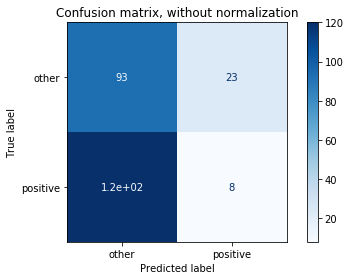

Normalized confusion matrix
[[0.80172414 0.19827586]
 [0.9375     0.0625    ]]


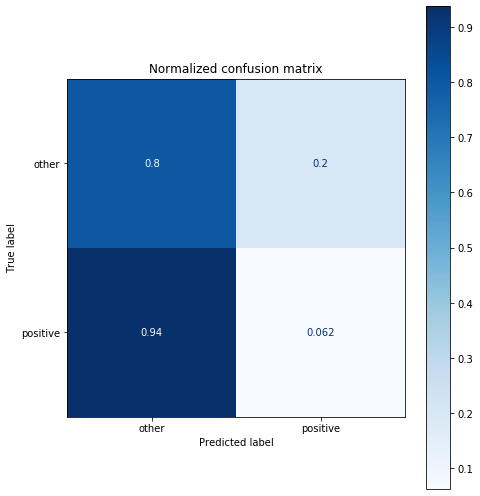

In [22]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [23]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data2_c_record_all_feature_50.iloc[0:476]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data2_c_record_all_feature_50.iloc[476:715]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data2_c_record_all_feature_50.iloc[476:715]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 15:24:41,2020-11-11 15:24:45,other,0.0
1,2020-11-11 15:24:42,2020-11-11 15:24:46,other,0.0
2,2020-11-11 15:24:43,2020-11-11 15:24:47,other,0.0
3,2020-11-11 15:24:44,2020-11-11 15:24:48,other,0.0
4,2020-11-11 15:24:45,2020-11-11 15:24:49,other,0.0
...,...,...,...,...
239,NaN,NaN,other,0.0
240,NaN,NaN,other,0.0
241,NaN,NaN,other,0.0
242,NaN,NaN,other,0.0


In [24]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 15:24:41,2020-11-11 15:24:45,other,0.0
1,2020-11-11 15:24:42,2020-11-11 15:24:46,positive,1.0
2,2020-11-11 15:24:43,2020-11-11 15:24:47,positive,1.0
3,2020-11-11 15:24:44,2020-11-11 15:24:48,positive,1.0
4,2020-11-11 15:24:45,2020-11-11 15:24:49,positive,1.0
...,...,...,...,...
239,NaN,NaN,other,0.0
240,NaN,NaN,other,0.0
241,NaN,NaN,other,0.0
242,NaN,NaN,other,0.0


In [25]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [26]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [27]:
test

,finish,emotion_level,label
start,,,
2020-11-11 15:15:24,2020-11-11 15:15:28,other,0.0
2020-11-11 15:15:25,2020-11-11 15:15:29,other,0.0
2020-11-11 15:15:26,2020-11-11 15:15:30,other,0.0
2020-11-11 15:15:27,2020-11-11 15:15:31,other,0.0
2020-11-11 15:15:28,2020-11-11 15:15:32,other,0.0
...,...,...,...
NaT,NaN,other,0.0
NaT,NaN,other,0.0
NaT,NaN,other,0.0


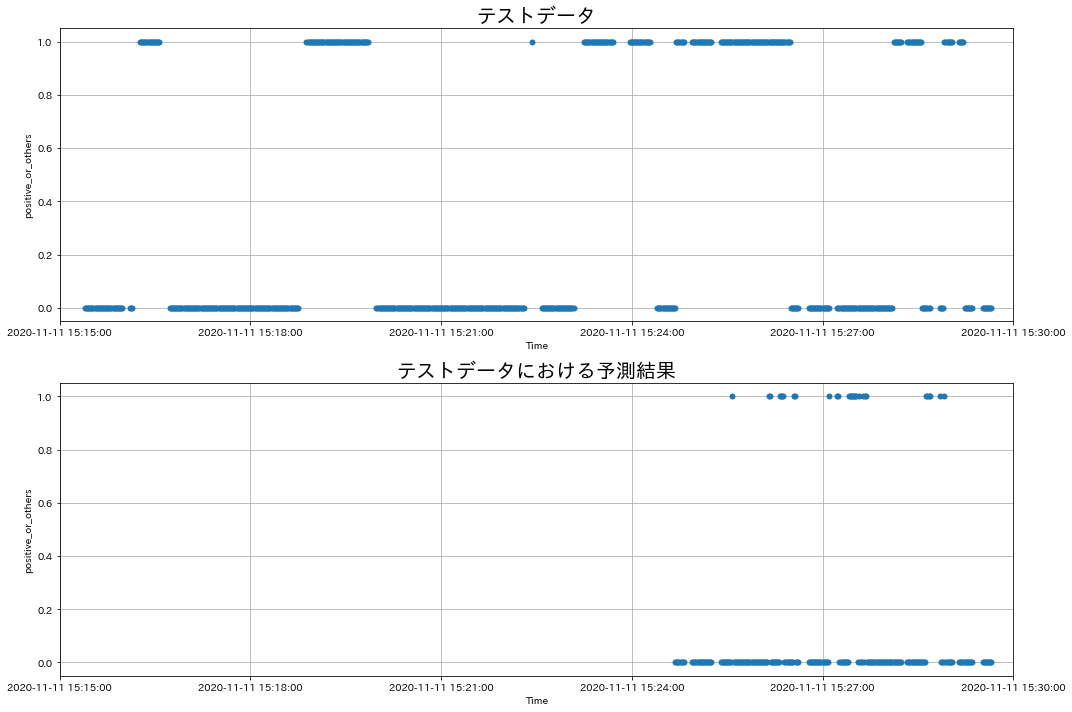

In [28]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
# ax1.set_ylim(0, 1)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(15, 31, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(15, 31, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)

plt.tight_layout()